# EDA data Telco Customer Churn 

##### Data Preprocessing

load all the necessary python libraries to preprocessing the data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("./Documents/Hamidah's/WA_Fn-UseC_-Telco-Customer-Churn.csv")

FileNotFoundError: [Errno 2] File b"./Documents/Hamidah's/WA_Fn-UseC_-Telco-Customer-Churn.csv" does not exist: b"./Documents/Hamidah's/WA_Fn-UseC_-Telco-Customer-Churn.csv"

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes


We will impute this missing values with zero

In [29]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

### Target variable


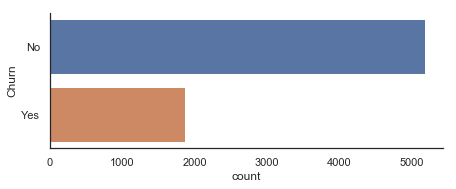

In [30]:
ax = sns.catplot(y="Churn", kind="count", data=df, height=2.6, aspect=2.5, orient='h')

### Numerical features

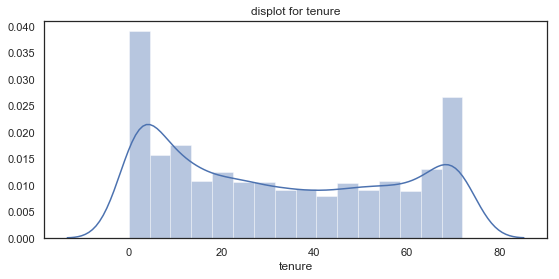

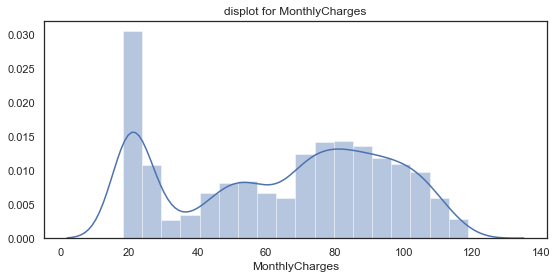

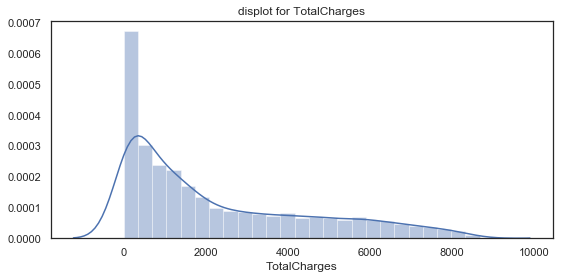

In [48]:
def distplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("displot for {}".format(feature))
    ax0 = sns.distplot(df[feature].dropna())
distplot('tenure')
distplot('MonthlyCharges')
distplot('TotalCharges')


#Total Transaction by Churn category
#Monthly Transaction by Churn category
#Total Transaction by Payment Method


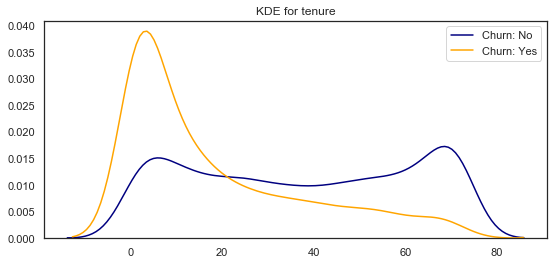

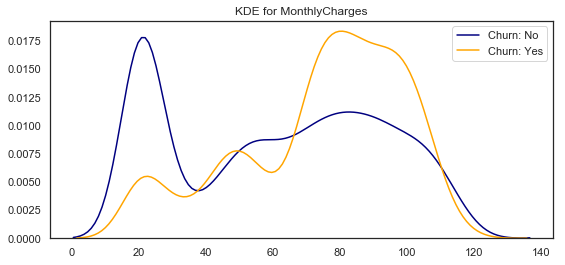

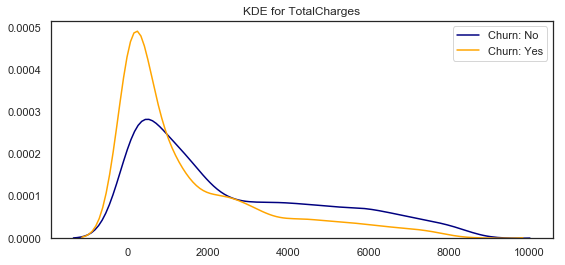

In [46]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

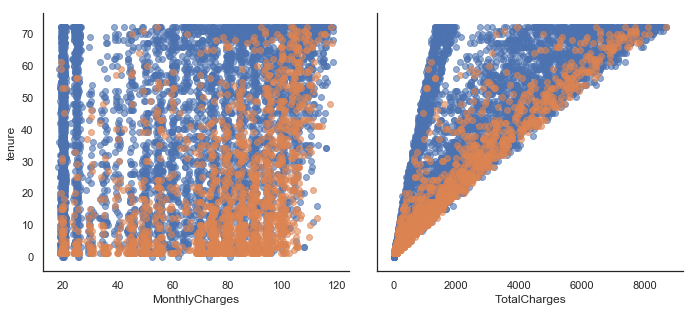

In [32]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

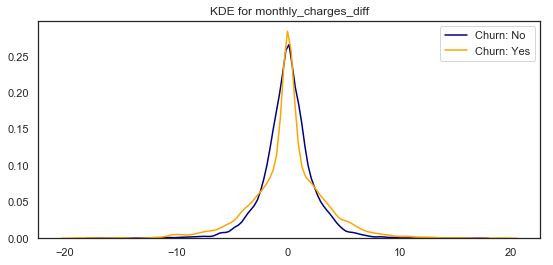

In [33]:
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

###  Categorical features

1. Gender and Age

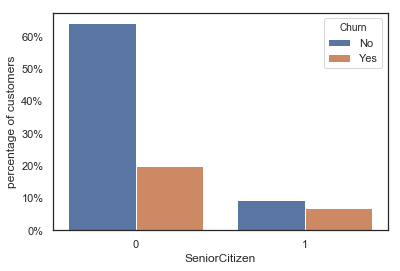

In [34]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

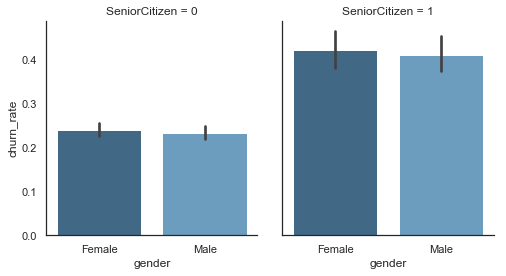

In [35]:
df['churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(df, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])

2. Partner and dependents

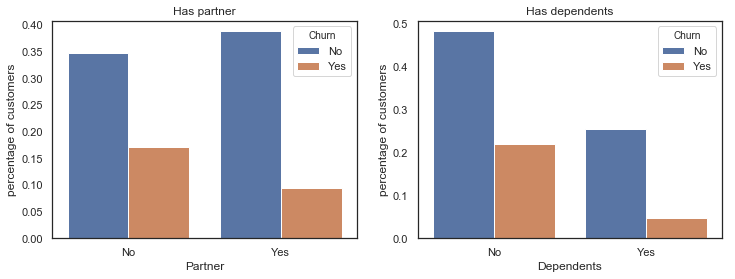

In [37]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = df.groupby('Partner')["Churn"].value_counts()/len(df)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = df.groupby('Dependents')["Churn"].value_counts()/len(df)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

3. Phone and internet services

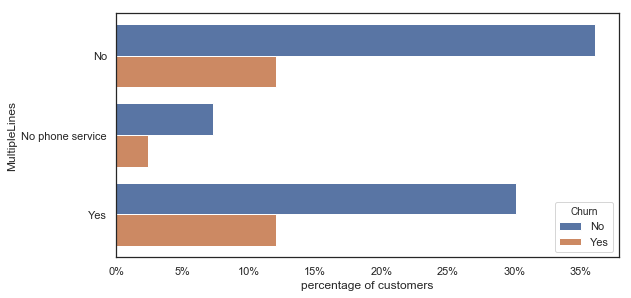

In [38]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

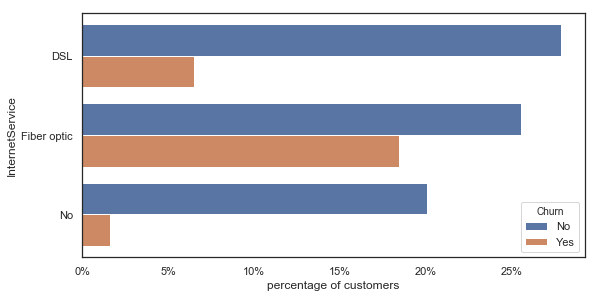

In [39]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

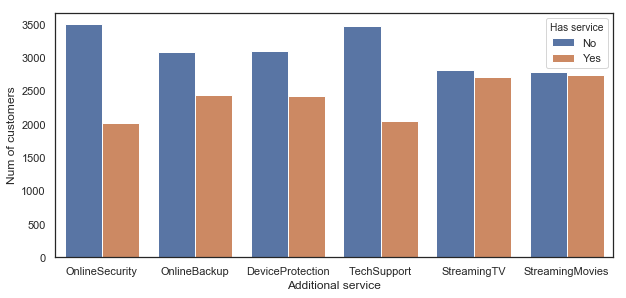

In [40]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

4. Contract and Payment

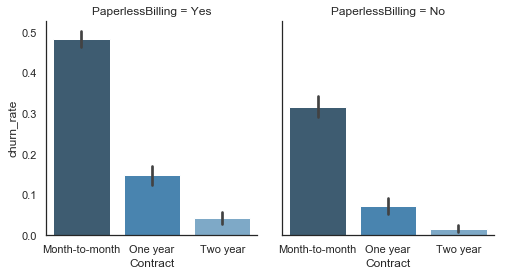

In [41]:
g = sns.FacetGrid(df, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

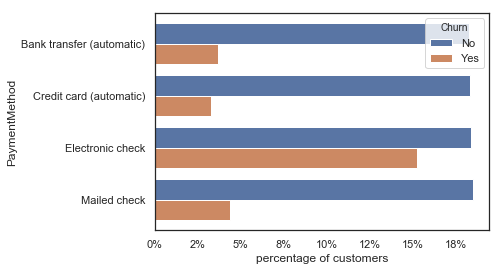

In [42]:
barplot_percentages("PaymentMethod", orient='h')

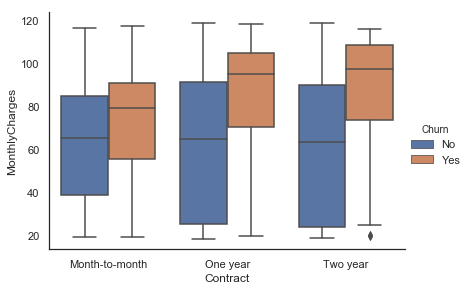

In [43]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=df, height=4.2, aspect=1.4)

### Correlation

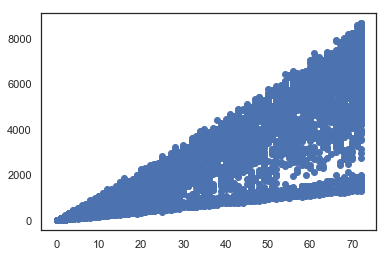

In [51]:
plt.scatter(df['tenure'], df['TotalCharges'])

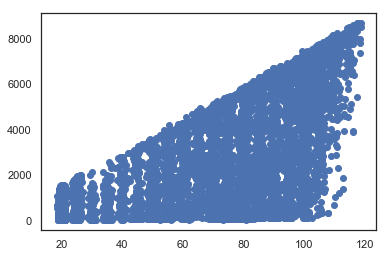

In [52]:
plt.scatter(df['MonthlyCharges'], df['TotalCharges'])

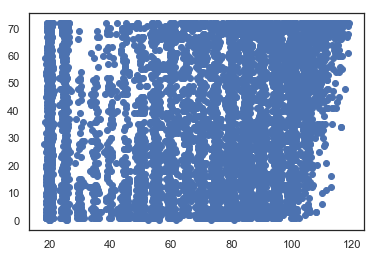

In [53]:
plt.scatter(df['MonthlyCharges'], df['tenure'])

In [55]:
correlation = df[['tenure', 'MonthlyCharges',
                       'TotalCharges']].\
                corr(method='spearman')

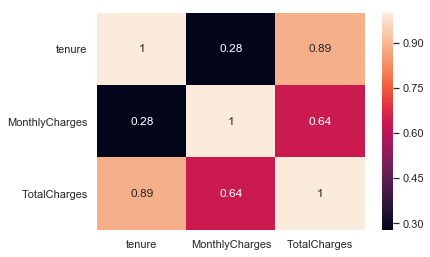

In [56]:
sns.heatmap(correlation, annot=True)
plt.show()

### Linear Regression

In [58]:
model = LinearRegression()

In [6]:
x = np.array(df["tenure"])

.reshape((-1, 1))
y = np.array(df["TotalCharges"])

NameError: name 'df' is not defined

In [63]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
model = LinearRegression().fit(x, y)

In [65]:
r_sq = model.score(x, y)

In [66]:
print('coefficient of determination:', model.score)

coefficient of determination: 0.6825707454050335


In [67]:
print('intercept:', model.intercept_)

intercept: -188.71893615394083


In [68]:
print('slope:', model.coef_)

slope: [76.25473122]
